<a href="https://colab.research.google.com/github/andrewng88/ml_from_scratch/blob/master/1_KNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def eucliedean_distance(x1,x2):
  '''calculate distance'''
  return  np.sqrt(np.sum(x1 -x2)**2)

class KNN:

    def __init__(self, k=3):
      self.k=k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      predicted_labels = [self._predict(x) for x in X]
      return np.array(predicted_labels)

    def _predict(self,x):
      # compute distances for each of the points
      distances = [eucliedean_distance(x,x_train) for x_train in self.X_train]
      # get k nearest samples, labels
      k_indices = np.argsort(distances)[:self.k]
      # consolidate the y labels based on k_indices
      k_nearest_labels = [self.y_train[i] for i in k_indices]
      # majority vote, return the most commmon class label
      most_common = Counter(k_nearest_labels).most_common(1)
      return most_common[0][0]

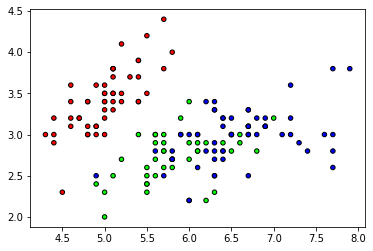

In [2]:
# create dataset for linear regression
iris = datasets.load_iris()
X, y = iris.data , iris.target 

# show iris data in 2d
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234,shuffle=True)

In [3]:
def accuracy(y_true,y_pred):
  '''Accuracy metric : how many are predicted correctly '''
  return np.sum(y_true == y_pred) / len(y_true)

clf = KNN(k=3)
clf.fit(X_train,y_train)

# predict the dataset
predictions = clf.predict(X_test)

print("KNN Classifier Accuracy:", accuracy(y_test, predictions))

KNN Classifier Accuracy: 0.9333333333333333
